## Dependencies

Listed here:
* https://duckdb.org/docs/guides/python/jupyter.html

In [ ]:
# Load duckdb, which lets us efficiently load large files
import duckdb

# Load pandas, which lets us manipulate dataframes
import pandas as pd

# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# Set configrations on jupysql to directly output data to Pandas and to simplify the output that is printed to the notebook.
%config SqlMagic.autopandas = True

%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Allow named parameters (python variables) in SQL cells
%config SqlMagic.named_parameters=True

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string. Either connect to an in memory DuckDB, or a file backed db.
%sql duckdb:///:memory:

: 

In [3]:
import yaml

yaml_path = '../american_community_survey/dbt_project.yml'
with open(yaml_path, 'r') as file:
    config = yaml.safe_load(file)

output_path = config['vars']['output_path']
print(output_path)

~/data/american_community_survey


In [4]:
%%sql 
SELECT * FROM read_parquet(['~/data/american_community_survey/psam_husa.parquet', '~/data/american_community_survey/psam_pusa.parquet'], union_by_name=True)

RT       SERIALNO  DIVISION   PUMA  REGION  ST     ADJHSG   ADJINC  \
0        H  2022GQ0000031         6  02803       3  01  1000000.0  1042311   
1        H  2022GQ0000111         6  02000       3  01  1000000.0  1042311   
2        H  2022GQ0000200         6  02803       3  01  1000000.0  1042311   
3        H  2022GQ0000261         6  01100       3  01  1000000.0  1042311   
4        H  2022GQ0000296         6  01502       3  01  1000000.0  1042311   
...     ..            ...       ...    ...     ...  ..        ...      ...   
2543377  P  2022HU1446341         6  01900       3  28        NaN  1042311   
2543378  P  2022HU1446341         6  01900       3  28        NaN  1042311   
2543379  P  2022HU1446341         6  01900       3  28        NaN  1042311   
2543380  P  2022HU1446384         6  01800       3  28        NaN  1042311   
2543381  P  2022HU1446384         6  01800       3  28        NaN  1042311   

         WGTP   NP  ...  PWGTP71  PWGTP72  PWGTP73  PWGTP74  PWGTP75  PWGTP76  \
0         0.0  1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1         0.0  1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2         0.0  1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3         0.0  1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4         0.0  1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
...       ...  ...  ...      ...      ...      ...      ...      ...      ...   
2543377   NaN  NaN  ...     87.0     70.0     20.0     27.0    192.0    195.0   
2543378   NaN  NaN  ...     88.0     81.0     23.0     29.0    195.0    174.0   
2543379   NaN  NaN  ...     62.0     66.0     15.0     29.0    159.0    109.0   
2543380   NaN  NaN  ...     35.0     11.0     10.0     10.0     34.0     39.0   
2543381   NaN  NaN  ...     68.0     24.0     24.0     31.0     65.0     72.0   

        PWGTP77  PWGTP78  PWGTP79  PWGTP80  
0           NaN      NaN      NaN      NaN  
1           NaN      NaN      NaN      NaN  
2           NaN      NaN      NaN      NaN  
3           NaN      NaN      NaN      NaN  
4           NaN      NaN      NaN      NaN  
...         ...      ...      ...      ...  
2543377    41.0     82.0    167.0     95.0  
2543378    33.0     59.0    154.0     87.0  
2543379    23.0     47.0    102.0     60.0  
2543380    30.0     33.0     41.0     13.0  
2543381    67.0     74.0     85.0     29.0  

[2543382 rows x 521 columns]

In [5]:
df = _

Text(0.5, 1.0, 'Age of the householder')

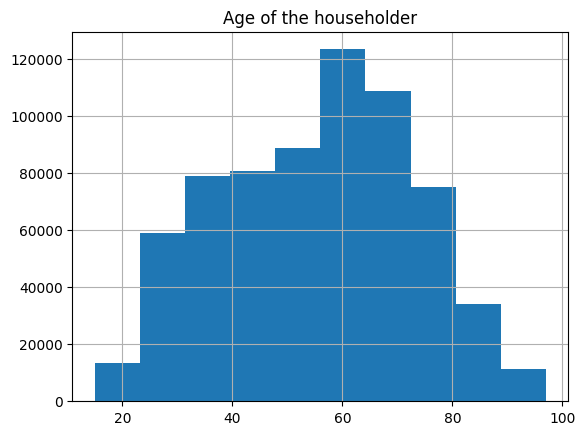

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['HHLDRAGEP'].hist(ax=ax)
ax.set_title('Age of the householder') # from 



In [10]:
output_path

'~/data/american_community_survey'

In [22]:
# collect the unique headers of all csv files recursively globbed in the output path
from pathlib import Path
import os

headers = set()
for path in Path(os.path.expanduser(output_path)).rglob('*.csv'):
    print(path)
    with open(path, 'r') as file:
        header = file.readline().split(',')
        path.name
        print(len(set(header)))
        for h in header:
            headers.add(h)


/Users/me/data/american_community_survey/2022/1-Year/csv_pmi/psam_p26.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hsc/psam_h45.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hsd/psam_h46.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pmn/psam_p27.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hut/psam_h49.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pal/psam_p01.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pnh/psam_p33.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pky/psam_p21.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husb.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_hus/psam_husa.csv
241
/Users/me/data/american_community_survey/2022/1-Year/csv_pak/psam_p02.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pma/psam_p25.csv
287
/Users/me/data/american_community_survey/2022/1-Year/csv_pmo/p

In [18]:
len(headers)

521

In [50]:
df = pd.read_json('../data/PUMS_Data_Dictionary_2022.json')

In [51]:
df

RT  \
Type                                                         C   
Length                                                       1   
Description                                        Record Type   
Values       [{'Code': 'H', 'Label': 'Housing Record or Gro...   

                                                      SERIALNO  \
Type                                                         C   
Length                                                      13   
Description               Housing unit/GQ person serial number   
Values       [{'Code': '2022GQ0000001', 'Label': 'GQ Unique...   

                                                      DIVISION  \
Type                                                         C   
Length                                                       1   
Description  Division code based on 2010 Census definitions...   
Values       [{'Code': '0', 'Label': 'Puerto Rico'}, {'Code...   

                                                          PUMA  \
Type                                                         C   
Length                                                       5   
Description  Public use microdata area code (PUMA) based on...   
Values       [{'Code': '00100', 'Label': 'Public use microd...   

                                                        REGION  \
Type                                                         C   
Length                                                       1   
Description       Region code based on 2020 Census definitions   
Values       [{'Code': '1', 'Label': 'Northeast'}, {'Code':...   

                                                            ST  \
Type                                                         C   
Length                                                       2   
Description        State Code based on 2020 Census definitions   
Values       [{'Code': '01', 'Label': 'Alabama/AL'}, {'Code...   

                                                        ADJHSG  \
Type                                                         C   
Length                                                       7   
Description  Adjustment factor for housing dollar amounts (...   
Values       [{'Code': '1000000', 'Label': '2022 factor (1....   

                                                        ADJINC  \
Type                                                         C   
Length                                                       7   
Description  Adjustment factor for income and earnings doll...   
Values       [{'Code': '1042311', 'Label': '2022 factor (1....   

                                                          WGTP  \
Type                                                         N   
Length                                                       5   
Description                                Housing Unit Weight   
Values       [{'Code': '0', 'Label': 'Group quarters place ...   

                                                            NP  ...  \
Type                                                         N  ...   
Length                                                       2  ...   
Description                Number of persons in this household  ...   
Values       [{'Code': '0', 'Label': 'Vacant unit'}, {'Code...  ...   

                                                       PWGTP71  \
Type                                                         N   
Length                                                       5   
Description                       Person's Weight replicate 71   
Values       [{'Code': '-9999', 'Label': 'Integer weight of...   

                                                       PWGTP72  \
Type                                                         N   
Length                                                       5   
Description                       Person's Weight replicate 72   
Values       [{'Code': '-9999', 'Label': 'Integer weight of...   

                                                       PWGTP73 

In [39]:
import json
with open('../data/PUMS_Data_Dictionary_2022.json', 'r') as file:
    data_dict = json.load(file)

# Initialize an empty list to hold all variable records and their values
records = []

# Iterate over each variable in the dictionary
for variable, details in data_dict.items():
    # Create a record for the variable itself
    var_record = {
        "Variable": variable,
        "Type": details["Type"],
        "Length": details["Length"],
        "Description": details["Description"],
    }
    records.append(var_record)
    
    # Add additional records for each value of the variable
    for value in details["Values"]:
        val_record = {
            "Variable": variable,
            "Code": value.get("Code", ""),
            "Label": value.get("Label", ""),
            # You can include other details from the variable if needed
        }
        records.append(val_record)


In [41]:
df = pd.DataFrame(records)


In [47]:
df = pd.read_csv("https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2022.csv", names=["Variable", "Type", "Length", "Description", "Code", "Label", "Desc"])


In [48]:
df

Variable      Type Length  Description  \
0        NAME        RT      C            1   
1         VAL        RT      C            1   
2         VAL        RT      C            1   
3        NAME  SERIALNO      C           13   
4         VAL  SERIALNO      C           13   
...       ...       ...    ...          ...   
5979      VAL   PWGTP78      N            5   
5980     NAME   PWGTP79      N            5   
5981      VAL   PWGTP79      N            5   
5982     NAME   PWGTP80      N            5   
5983      VAL   PWGTP80      N            5   

                                      Code          Label  \
0                              Record Type            NaN   
1                                        H              H   
2                                        P              P   
3     Housing unit/GQ person serial number            NaN   
4                            2022GQ0000001  2022GQ9999999   
...                                    ...            ...   
5979                                 -9999           9999   
5980          Person's Weight replicate 79            NaN   
5981                                 -9999           9999   
5982          Person's Weight replicate 80            NaN   
5983                                 -9999           9999   

                                       Desc  
0                                       NaN  
1     Housing Record or Group Quarters Unit  
2                             Person Record  
3                                       NaN  
4                      GQ Unique identifier  
...                                     ...  
5979               Integer weight of person  
5980                                    NaN  
5981               Integer weight of person  
5982                                    NaN  
5983               Integer weight of person  

[5984 rows x 7 columns]